## Supervised Learning
## Case Study : Victorian Authors


The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Victorian+Era+Authorship+Attribution#). 

In [ ]:
import urllib.request
corpus_data = [
    'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/ml-glass/author_list.txt',
    'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/ml-glass/data-train.csv'
]
for url in corpus_data:
    urllib.request.urlretrieve(url, 'data/' + url.rsplit('/', 1)[-1])

In [55]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("data/data-train.csv")

# Success - Display the first record
display(data.head(n=1))

import warnings
warnings.filterwarnings('ignore')

,text,author
0,ou have time to listen i will give you the ent...,1


In [56]:
n_records = len(data.index)
n_records

53678

In [57]:
#Remove all non-ASCII characters
data["text"] = data["text"].str.replace(r"[^\x00-\x7F]", "", regex=True)

In [58]:
features = data['text']
target = data['author']

In [59]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 42942 samples.
Testing set has 10736 samples.


In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
dtm = vect.fit_transform(X_train)

In [61]:
print(vect.vocabulary_)

{'she': 7803, 'to': 8966, 'him': 4181, 'already': 298, 'having': 4066, 'the': 8803, 'title': 8952, 'traced': 9041, 'and': 346, 'oh': 5972, 'way': 9606, 'remind': 7160, 'me': 5399, 'morrow': 5616, 'have': 4064, 'trace': 9040, 'it': 4757, 'now': 5859, 'if': 4359, 'anybody': 393, 'comes': 1576, 'in': 4458, 'looking': 5199, 'for': 3486, 'cheap': 1362, 'house': 4279, 'remember': 7155, 'we': 9609, 'got': 3832, 'that': 8801, 'road': 7391, 'place': 6429, 'off': 5949, 'somebody': 8114, 'you': 9936, 'need': 5751, 'be': 749, 'at': 584, 'hi': 4164, 'back': 681, 'by': 1168, 'two': 9206, 'he': 4073, 'ashes': 531, 'his': 4192, 'placed': 6430, 'difficult': 2387, 'letter': 5066, 'on': 5987, 'pile': 6395, 'of': 5948, 'unfinished': 9272, 'work': 9830, 'mi': 5484, 'not': 5837, 'fail': 3173, 'attend': 601, 'afternoon': 216, 'three': 8877, 'had': 3965, 'same': 7538, 'sheet': 7809, 'yellow': 9920, 'paper': 6165, 'see': 7669, 'apt': 458, 'gave': 3712, 'an': 339, 'agreeable': 235, 'feeling': 3280, 'about': 17,

In [62]:
print(dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
#supervised learning model from sklearn
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
classif = model.fit(dtm, y_train)


In [64]:
#Make Predictions on the Test Data
dtm_test = vect.fit_transform(X_test)
y_pred = classif.predict(dtm_test)

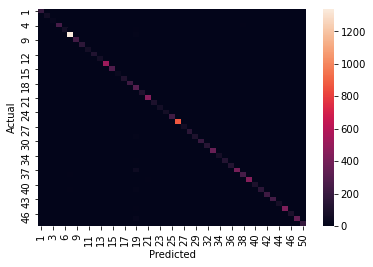

In [65]:

#Evaluation Libraries
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# count the number of labels
labels = np.unique(y_pred)

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# use sns.heatmap on top of confusion_matrix to show the confusion matrix
ax = sns.heatmap(df_cm)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       193
           2       0.98      0.94      0.96        67
           3       0.96      0.90      0.93        29
           4       0.93      0.86      0.89       292
           6       0.96      0.85      0.90        82
           8       0.97      0.98      0.97      1371
           9       1.00      0.97      0.99       238
          10       0.99      0.97      0.98       164
          11       1.00      0.92      0.96        79
          12       0.99      0.98      0.98       123
          13       0.99      0.94      0.96        78
          14       0.99      0.98      0.99       532
          15       0.98      0.98      0.98       287
          16       0.94      0.92      0.93        37
          17       0.89      0.96      0.92       119
          18       0.99      0.96      0.98       223
          19       0.60      1.00      0.75       298
          20       0.98    

In [ ]:
#test_Y_hat = model.predict(test_X)
#write_test_prediction(test_dataframe, test_Y_hat, './testing.csv')